In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from sklearn import metrics 
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
import random
from numpy import *
from PIL import Image
import os
import tensorflow as tf
import cv2
import imghdr
from matplotlib import pyplot as plt
from sklearn.metrics import f1_score
import pandas as pd
from keras.optimizers import Adam
from tensorflow import keras
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
CATEGORIES = ['pink primrose',    'hard-leaved pocket orchid', 'canterbury bells', 'sweet pea',     'wild geranium',     'tiger lily',           'moon orchid',              'bird of paradise', 'monkshood',        'globe thistle',         # 00 - 09
           'snapdragon',       "colt's foot",               'king protea',      'spear thistle', 'yellow iris',       'globe-flower',         'purple coneflower',        'peruvian lily',    'balloon flower',   'giant white arum lily', # 10 - 19
           'fire lily',        'pincushion flower',         'fritillary',       'red ginger',    'grape hyacinth',    'corn poppy',           'prince of wales feathers', 'stemless gentian', 'artichoke',        'sweet william',         # 20 - 29
           'carnation',        'garden phlox',              'love in the mist', 'cosmos',        'alpine sea holly',  'ruby-lipped cattleya', 'cape flower',              'great masterwort', 'siam tulip',       'lenten rose',           # 30 - 39
           'barberton daisy',  'daffodil',                  'sword lily',       'poinsettia',    'bolero deep blue',  'wallflower',           'marigold',                 'buttercup',        'daisy',            'common dandelion',      # 40 - 49
           'petunia',          'wild pansy',                'primula',          'sunflower',     'lilac hibiscus',    'bishop of llandaff',   'gaura',                    'geranium',         'orange dahlia',    'pink-yellow dahlia',    # 50 - 59
           'cautleya spicata', 'japanese anemone',          'black-eyed susan', 'silverbush',    'californian poppy', 'osteospermum',         'spring crocus',            'iris',             'windflower',       'tree poppy',            # 60 - 69
           'gazania',          'azalea',                    'water lily',       'rose',          'thorn apple',       'morning glory',        'passion flower',           'lotus',            'toad lily',        'anthurium',             # 70 - 79
           'frangipani',       'clematis',                  'hibiscus',         'columbine',     'desert-rose',       'tree mallow',          'magnolia',                 'cyclamen ',        'watercress',       'canna lily',            # 80 - 89
           'hippeastrum ',     'bee balm',                  'pink quill',       'foxglove',      'bougainvillea',     'camellia',             'mallow',                   'mexican petunia',  'bromelia',         'blanket flower',        # 90 - 99
           'trumpet creeper',  'blackberry lily',           'common tulip',     'wild rose']

In [4]:
def plot_Loss(history) :
    plt.plot(history.history['loss'] , label='Train')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [5]:
def plot_Accuracy(history) :
    plt.plot(history.history['accuracy'] , label='Train')
    plt.plot(history.history['val_accuracy'] , label='Validation')
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

In [6]:
def prepare(testdata):
    y_pred=model.predict(testdata[0])
    labels=testdata[1]
    y_pred=np.argmax(y_pred, axis=1)
    return y_pred , labels
    

#  Number of samples in each Class 

In [143]:
classes=os.listdir(os.path.join('/kaggle/input/flower-classification/Data/train'))
for cls in classes:
    cls_dir = os.path.join('/kaggle/input/flower-classification/Data/train', cls)
    n_samples = len(os.listdir(cls_dir))
    print(f"{cls}: {n_samples} samples")

7: 105 samples
47: 261 samples
17: 50 samples
81: 101 samples
19: 26 samples
22: 48 samples
2: 20 samples
35: 36 samples
92: 24 samples
50: 201 samples
23: 19 samples
87: 146 samples
10: 136 samples
5: 87 samples
61: 29 samples
36: 57 samples
20: 19 samples
45: 172 samples
60: 27 samples
27: 34 samples
64: 55 samples
41: 96 samples
89: 46 samples
39: 73 samples
32: 23 samples
98: 34 samples
25: 83 samples
42: 63 samples
52: 115 samples
75: 306 samples
8: 87 samples
38: 19 samples
12: 92 samples
94: 131 samples
55: 58 samples
49: 563 samples
0: 272 samples
31: 24 samples
62: 93 samples
53: 460 samples
101: 25 samples
70: 104 samples
34: 18 samples
18: 90 samples
79: 118 samples
85: 29 samples
88: 96 samples
65: 33 samples
67: 782 samples
78: 86 samples
28: 119 samples
66: 21 samples
56: 89 samples
72: 167 samples
16: 55 samples
13: 263 samples
99: 24 samples
26: 21 samples
74: 125 samples
15: 21 samples
3: 21 samples
90: 106 samples
69: 94 samples
77: 139 samples
102: 390 samples
86: 12

# Load the Data

In [18]:
# from typing import Any
# traindata,valdata = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/Data/train',batch_size=32,
#     image_size=(192, 192), validation_split=0.1,subset="both", seed=Any)
#     import tensorflow as tf

train_data = tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/flower-classification/Data/train',
    validation_split=0.1,
    subset='training',
    seed=123,
    image_size=(192, 192),
    batch_size=32
)

val_data = tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/flower-classification/Data/train',
    validation_split=0.1,
    subset='validation',
    seed=123,
    image_size=(192, 192),
    batch_size=32
)


Found 12753 files belonging to 104 classes.
Using 11478 files for training.
Found 12753 files belonging to 104 classes.
Using 1275 files for validation.


In [19]:
test_data = tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/flower-classification/Data/test',image_size=(192, 192),batch_size=3712
) # to have all data in test with images and its labels separated,

Found 3712 files belonging to 104 classes.


In [20]:
test_data=test_data.as_numpy_iterator().next() #to access images and their labels 

# (b) visualize some images from different classes


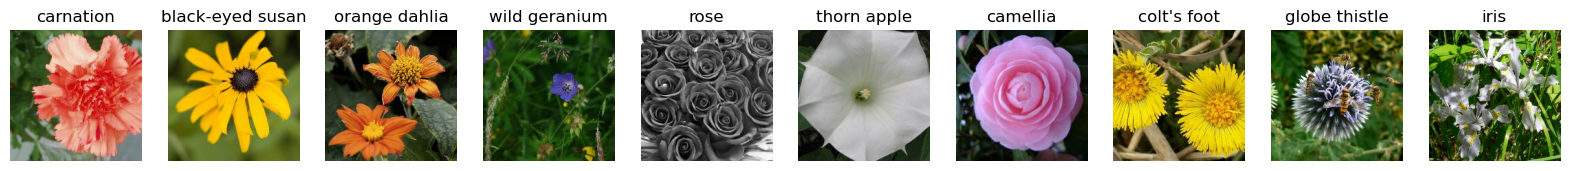

In [14]:
first_batch = next(iter(train_data))
class_names = train_data.class_names
fig, axs = plt.subplots(1, 10, figsize=(20, 20))

for i in range(10):
    axs[i].imshow(first_batch[0][i].numpy().astype("uint8"))
    axs[i].axis('off')
    axs[i].set_title(CATEGORIES[int(class_names[first_batch[1][i]])])

plt.show()

# Simple Model

In [12]:
from tensorflow import keras

In [46]:
data_augmentation = keras.Sequential(
  [
      
    tf.keras.layers.RandomFlip("horizontal",
                      input_shape=(192,
                                  192,
                                  3)),
    tf.keras.layers.RandomRotation(0.1),
 tf.keras.layers.Rescaling(1./255)
  ]
)

In [76]:

model = tf.keras.models.Sequential([
    data_augmentation,
    tf.keras.layers.Conv2D(32, (5,5), activation='relu', input_shape=(192, 192, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(104, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

checkpoint_path = "/kaggle/working/training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,save_best_only = True,
                                                 save_weights_only=True)

hist = model.fit( train_data,
    validation_data=val_data,
    epochs=10,callbacks=[cp_callback])


Epoch 1/10
359/359 [==============================] - 29s 73ms/step - loss: 3.7895 - accuracy: 0.1120 - val_loss: 3.3821 - val_accuracy: 0.1773
Epoch 2/10
359/359 [==============================] - 26s 72ms/step - loss: 3.3053 - accuracy: 0.1815 - val_loss: 3.0182 - val_accuracy: 0.2408
Epoch 3/10
359/359 [==============================] - 26s 70ms/step - loss: 2.9860 - accuracy: 0.2410 - val_loss: 2.7341 - val_accuracy: 0.2894
Epoch 4/10
359/359 [==============================] - 26s 69ms/step - loss: 2.7616 - accuracy: 0.2827 - val_loss: 2.6057 - val_accuracy: 0.3333
Epoch 5/10
359/359 [==============================] - 26s 72ms/step - loss: 2.5946 - accuracy: 0.3265 - val_loss: 2.4709 - val_accuracy: 0.3561
Epoch 6/10
359/359 [==============================] - 26s 70ms/step - loss: 2.4576 - accuracy: 0.3471 - val_loss: 2.3564 - val_accuracy: 0.3984
Epoch 7/10
359/359 [==============================] - 27s 73ms/step - loss: 2.3449 - accuracy: 0.3737 - val_loss: 2.2970 - val_accuracy:

In [77]:
y_pred , labels=prepare(test_data)

116/116 [==============================] - 1s 11ms/step


In [78]:
from sklearn.metrics import accuracy_score
accuracy_score(labels, y_pred)
print("Accuracy: {:5.2f}%".format(100 * accuracy_score(labels, y_pred)))

Accuracy: 46.20%


In [79]:
model.load_weights(checkpoint_path)  # Loads the weights

In [81]:
pd.DataFrame(confusion_matrix(labels, y_pred), columns=CATEGORIES, index=CATEGORIES)

,pink primrose,hard-leaved pocket orchid,canterbury bells,sweet pea,wild geranium,tiger lily,moon orchid,bird of paradise,monkshood,globe thistle,...,bougainvillea,camellia,mallow,mexican petunia,bromelia,blanket flower,trumpet creeper,blackberry lily,common tulip,wild rose
pink primrose,46,0,0,0,0,0,10,0,0,2,...,0,0,0,0,0,0,1,0,0,0
hard-leaved pocket orchid,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
canterbury bells,0,0,3,0,0,5,2,0,0,0,...,0,0,0,0,2,0,0,0,0,0
sweet pea,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
wild geranium,0,0,0,0,1,2,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
blanket flower,0,0,0,0,0,0,4,0,0,0,...,0,0,0,0,0,8,0,0,0,0
trumpet creeper,2,0,0,0,0,2,3,0,0,0,...,0,1,0,3,1,0,1,0,0,0
blackberry lily,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4,0,0
common tulip,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,8,0


In [82]:
f1_score_macro = f1_score(labels,y_pred,average='macro')
f1_score_macro

0.363095354574961

In [83]:
sorted_labels = np.argsort(f1_score(labels,y_pred,average=None)[0 : 8])
confusing_classes=[ CATEGORIES[label] for label in sorted_labels ]
confusing_classes

['sweet pea',
 'canterbury bells',
 'bird of paradise',
 'wild geranium',
 'tiger lily',
 'hard-leaved pocket orchid',
 'moon orchid',
 'pink primrose']

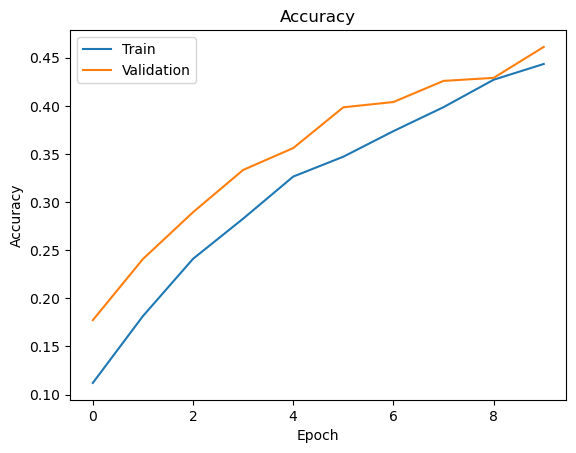

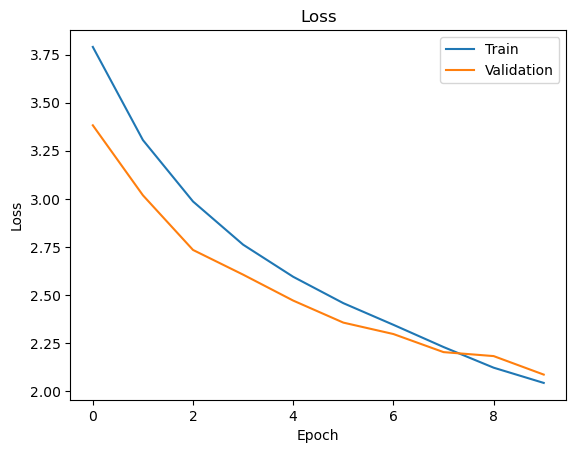

In [84]:
plot_Accuracy(hist)
plot_Loss(hist)

# ResNet50 Model

In [88]:
from tensorflow.keras.applications import ResNet50

# Initialize the Pretrained Model
feature_extractor = ResNet50(weights=None, 
                             input_shape=(192, 192, 3),
                             include_top=False)
feature_extractor.load_weights('/kaggle/input/weights/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5')
# Set this parameter to make sure it's not being trained
feature_extractor.trainable = False

# Set the input layer
# input_ = data_augmentation

# Set the feature extractor layer
# x = feature_extractor(input_, training=False)

# Set the pooling layer
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
Dropout=tf.keras.layers.Dropout(0.6)


# Set the final layer with sigmoid activation function
prediction_layer = tf.keras.layers.Dense(104, activation='softmax')

# Create the new model object
model = tf.keras.Sequential([
  feature_extractor,
  global_average_layer,
  Dropout,
  prediction_layer
])


checkpoint_path = "/kaggle/working/training_resnet/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,save_best_only = True,
                                                 save_weights_only=True)


# The model weights (that are considered the best) are loaded into the
# model.
# Compile it
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# Print The Summary of The Model
model.summary()





Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 6, 6, 2048)        23587712  
                                                                 
 global_average_pooling2d_6   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_19 (Dropout)        (None, 2048)              0         
                                                                 
 dense_32 (Dense)            (None, 104)               213096    
                                                                 
Total params: 23,800,808
Trainable params: 213,096
Non-trainable params: 23,587,712
_________________________________________________________________


In [89]:
history=model.fit( train_data,
    validation_data=val_data,
    epochs=10,callbacks=[cp_callback])

Epoch 1/10
359/359 [==============================] - 32s 80ms/step - loss: 2.9658 - accuracy: 0.3664 - val_loss: 1.2632 - val_accuracy: 0.6753
Epoch 2/10
359/359 [==============================] - 28s 77ms/step - loss: 1.4525 - accuracy: 0.6203 - val_loss: 1.0406 - val_accuracy: 0.7373
Epoch 3/10
359/359 [==============================] - 28s 77ms/step - loss: 1.1480 - accuracy: 0.6845 - val_loss: 0.9755 - val_accuracy: 0.7498
Epoch 4/10
359/359 [==============================] - 28s 77ms/step - loss: 1.0002 - accuracy: 0.7220 - val_loss: 0.9527 - val_accuracy: 0.7467
Epoch 5/10
359/359 [==============================] - 27s 73ms/step - loss: 0.8913 - accuracy: 0.7470 - val_loss: 0.8780 - val_accuracy: 0.7710
Epoch 6/10
359/359 [==============================] - 27s 73ms/step - loss: 0.8227 - accuracy: 0.7620 - val_loss: 0.9069 - val_accuracy: 0.7765
Epoch 7/10
359/359 [==============================] - 29s 80ms/step - loss: 0.7854 - accuracy: 0.7770 - val_loss: 0.9123 - val_accuracy:

In [51]:
model.load_weights(checkpoint_path)

In [90]:
y_pred , labels=prepare(test_data)

116/116 [==============================] - 6s 43ms/step


In [91]:
f1_score_macro = f1_score(labels,y_pred,average='macro')
f1_score_macro

0.7635888026232599

In [92]:
sorted_labels = np.argsort(f1_score(labels,y_pred,average=None)[0 : 8])
confusing_classes=[ CATEGORIES[label] for label in sorted_labels ]
confusing_classes

['sweet pea',
 'hard-leaved pocket orchid',
 'moon orchid',
 'canterbury bells',
 'bird of paradise',
 'wild geranium',
 'tiger lily',
 'pink primrose']

In [93]:
import pandas as pd
type(confusion_matrix(labels, y_pred))
pd.DataFrame(confusion_matrix(labels, y_pred), columns=CATEGORIES, index=CATEGORIES)

,pink primrose,hard-leaved pocket orchid,canterbury bells,sweet pea,wild geranium,tiger lily,moon orchid,bird of paradise,monkshood,globe thistle,...,bougainvillea,camellia,mallow,mexican petunia,bromelia,blanket flower,trumpet creeper,blackberry lily,common tulip,wild rose
pink primrose,56,0,0,0,0,0,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
hard-leaved pocket orchid,0,4,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
canterbury bells,0,0,26,0,0,0,3,0,0,1,...,0,0,0,0,0,0,0,0,0,0
sweet pea,0,0,1,4,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
wild geranium,0,0,0,0,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
blanket flower,0,0,0,0,0,0,4,0,0,0,...,0,0,0,0,0,21,2,0,0,0
trumpet creeper,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,2,19,0,0,0
blackberry lily,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,8,0,0
common tulip,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,9,0


In [94]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(labels, y_pred, target_names=CATEGORIES))

                           precision    recall  f1-score   support

            pink primrose       0.86      0.71      0.78        79
hard-leaved pocket orchid       1.00      0.57      0.73         7
         canterbury bells       0.90      0.65      0.75        40
                sweet pea       1.00      0.44      0.62         9
            wild geranium       0.83      0.71      0.77         7
               tiger lily       0.78      0.77      0.78       114
              moon orchid       0.65      0.84      0.73       216
         bird of paradise       1.00      0.62      0.76        13
                monkshood       1.00      0.74      0.85        27
            globe thistle       0.92      0.88      0.90        77
               snapdragon       0.84      0.94      0.89        66
              colt's foot       0.80      0.67      0.73         6
              king protea       1.00      0.94      0.97        16
            spear thistle       0.75      0.64      0.69     

In [95]:
from sklearn.metrics import accuracy_score
accuracy_score(labels, y_pred)
print("Accuracy: {:5.2f}%".format(100 * accuracy_score(labels, y_pred)))

Accuracy: 78.04%


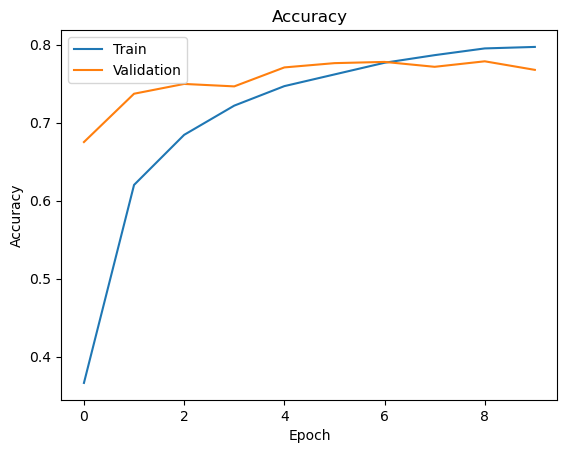

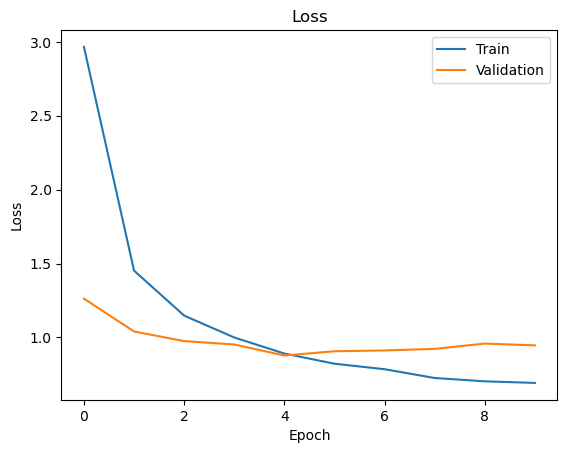

In [96]:
plot_Accuracy(history)
plot_Loss(history)

# VGG16 Model

In [105]:
# instantiating a VGG16 model pre-loaded with weights trained on ImageNet
# Specifying the include_top=False argument to load a network that doesn’t include the classification layers

VGG16_MODEL=tf.keras.applications.VGG16(input_shape=(192, 192, 3),
                                               include_top=False,
                                               weights=None)
VGG16_MODEL.load_weights('/kaggle/input/vgg16-weights/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5')
# Freezing the convoltion layers to avoid updation of weight
VGG16_MODEL.trainable=False
# Global average pooling operation for spatial data
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

Dropout=tf.keras.layers.Dropout(0.5)
# relu=prediction_layer = tf.keras.layers.Dense(250,activation='relu')
# layer to convert these features into 104 prediction per image
prediction_layer = tf.keras.layers.Dense(104,activation='softmax')
# Stacking VGG model with fine tuned classification layers to build model
model = tf.keras.Sequential([
  data_augmentation,
  tf.keras.layers.Rescaling(1./255),
  VGG16_MODEL,
  global_average_layer,
  relu,
  Dropout,
  prediction_layer
])


# Compiling the model
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])


checkpoint_path = "/kaggle/working/training_Vgg16/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,save_best_only = True,
                                                 save_weights_only=True)
# model.summary()

In [82]:
history = model.fit(train_data, epochs=10 , callbacks=[cp_callback], validation_data=val_data)

Epoch 1/10
359/359 [==============================] - 45s 118ms/step - loss: 3.7747 - accuracy: 0.2299 - val_loss: 2.4577 - val_accuracy: 0.4400
Epoch 2/10
359/359 [==============================] - 27s 73ms/step - loss: 2.6965 - accuracy: 0.3758 - val_loss: 1.9438 - val_accuracy: 0.5443
Epoch 3/10
359/359 [==============================] - 25s 70ms/step - loss: 2.3503 - accuracy: 0.4305 - val_loss: 1.7691 - val_accuracy: 0.5749
Epoch 4/10
359/359 [==============================] - 27s 74ms/step - loss: 2.1174 - accuracy: 0.4676 - val_loss: 1.6542 - val_accuracy: 0.5992
Epoch 5/10
359/359 [==============================] - 26s 72ms/step - loss: 2.0421 - accuracy: 0.4851 - val_loss: 1.6088 - val_accuracy: 0.6031
Epoch 6/10
359/359 [==============================] - 27s 73ms/step - loss: 1.9651 - accuracy: 0.4927 - val_loss: 1.5494 - val_accuracy: 0.6086
Epoch 7/10
359/359 [==============================] - 26s 72ms/step - loss: 1.8570 - accuracy: 0.5211 - val_loss: 1.4955 - val_accuracy

In [69]:
y_pred , labels=prepare(test_data)

116/116 [==============================] - 6s 49ms/step


In [70]:
from sklearn.metrics import accuracy_score
accuracy_score(labels, y_pred)
print("Accuracy: {:5.2f}%".format(100 * accuracy_score(labels, y_pred)))

Accuracy: 66.33%


In [71]:
model.load_weights(checkpoint_path)  # Loads the weights

In [72]:
pd.DataFrame(confusion_matrix(labels, y_pred), columns=CATEGORIES, index=CATEGORIES)

,pink primrose,hard-leaved pocket orchid,canterbury bells,sweet pea,wild geranium,tiger lily,moon orchid,bird of paradise,monkshood,globe thistle,...,bougainvillea,camellia,mallow,mexican petunia,bromelia,blanket flower,trumpet creeper,blackberry lily,common tulip,wild rose
pink primrose,56,0,0,0,0,0,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
hard-leaved pocket orchid,0,5,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
canterbury bells,0,0,14,0,0,4,1,0,0,0,...,0,0,0,3,1,0,0,0,0,0
sweet pea,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
wild geranium,0,0,0,0,7,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
blanket flower,0,0,0,0,0,0,3,0,0,0,...,0,0,0,0,2,12,1,0,0,0
trumpet creeper,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,7,0,0,0
blackberry lily,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,5,0,0
common tulip,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,8,0


In [73]:
f1_score_macro = f1_score(labels,y_pred,average='macro')
f1_score_macro

0.5826779561380621

In [75]:
sorted_labels = np.argsort(f1_score(labels,y_pred,average=None)[0 : 8])
confusing_classes=[ CATEGORIES[label] for label in sorted_labels ]
confusing_classes

['sweet pea',
 'canterbury bells',
 'tiger lily',
 'moon orchid',
 'pink primrose',
 'hard-leaved pocket orchid',
 'bird of paradise',
 'wild geranium']

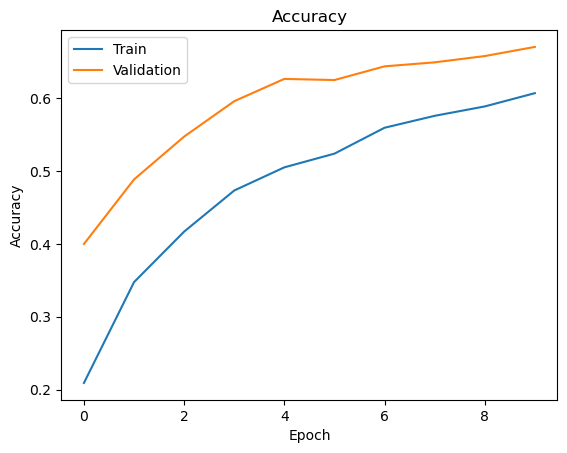

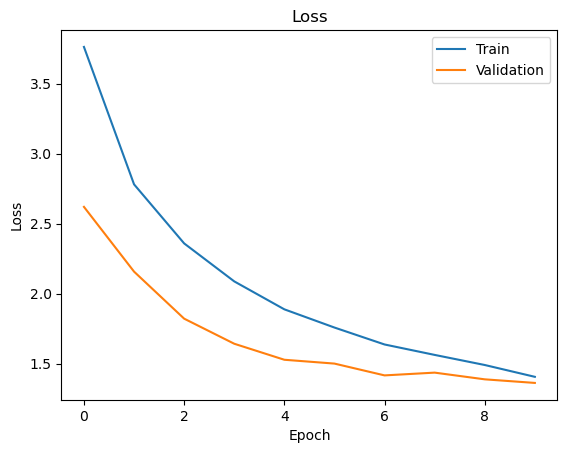

In [76]:
plot_Accuracy(history)
plot_Loss(history)